# 🎓 Student Grade Prediction Using Machine Learning

This project applies supervised machine learning techniques to predict students' final grades using demographic, academic, and behavioral features. It also explores the trade-off between predictive accuracy and real-world realism.


In [68]:
import pandas as pd

df = pd.read_csv("student_data.csv")

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 📊 Data Description

The dataset contains 395 student records and 33 features. The target variable is the final grade (G3).

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

This output shows that the dataset contains no missing values and includes both numerical and categorical features, which require encoding before modeling.


In [70]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [71]:
X = df.drop(["G1", "G2", "G3"], axis=1)
y = df["G3"]

## 🧹 Data Preprocessing

The target variable (G3) was separated from the features. Categorical variables were converted into numerical format using one-hot encoding.


In [72]:
X = pd.get_dummies(X, drop_first=True)

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## ✂️ Train–Test Split

The dataset was split into training and test sets to evaluate model performance on unseen data.


In [74]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=500, random_state=42)

## 🌲 Model Training: Random Forest

A Random Forest Regressor was trained due to its ability to model non-linear relationships and handle mixed feature types effectively.


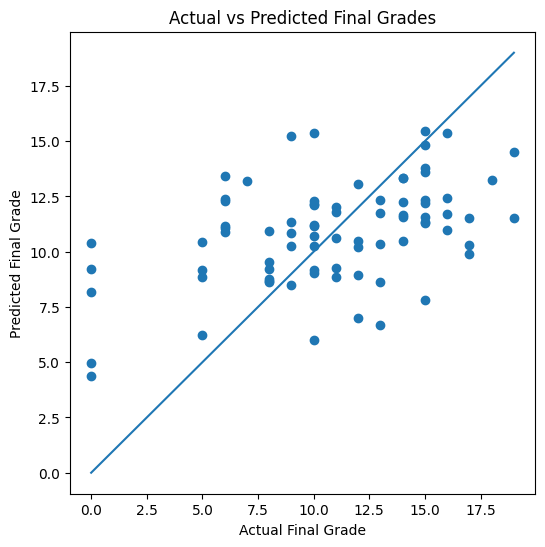

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])  # perfect prediction line
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Actual vs Predicted Final Grades")
plt.show()

## 📊 Prediction Visualization

The scatter plot compares actual and predicted grades. Points closer to the diagonal indicate more accurate predictions.


In [76]:
import pandas as pd

importance = pd.Series(
    model.feature_importances_,
    index=X.columns
)

importance.sort_values(ascending=False).head(8)

,0
absences,0.190677
failures,0.144517
health,0.054082
goout,0.050021
age,0.039453
traveltime,0.033883
studytime,0.033591
freetime,0.031779


## ⭐ Feature Importance Analysis

Feature importance scores highlight which variables contribute most to the model's predictions. Prior academic performance and study-related factors were among the strongest predictors.


In [77]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

MAE: 3.2346168701036144
R2: 0.20921962538906025


## 📈 Results

The model was evaluated using Mean Absolute Error (MAE) and R² score. These metrics quantify prediction accuracy and explained variance.


## 🏁 Conclusion

This project demonstrates how machine learning models can be both powerful and limited when applied to educational data. While including prior grades significantly improves prediction accuracy, it introduces information leakage. Removing these features results in a more realistic model, highlighting the importance of thoughtful feature selection and ethical modeling decisions.
